# Homework 5: Confidence Intervals, the Bootstrap, and Autograders
***

**Name**: 

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday November 10th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

### [20 points] Problem 1 - Alcohol Content of Red vs White Wine 
***

Load the data in $\texttt{winequality-red.csv}$ and $\texttt{winequality-white.csv}$ into Pandas DataFrames.  A description of this dataset can be found on [Berkeley's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The characteristic that we'll be interested in is the wine's alcohol content.  

In [2]:
# Load the two data into pandas dataframes
wine_red   = pd.read_csv('winequality-red.csv', sep=';')
wine_white = pd.read_csv('winequality-white.csv', sep=';')

**Part A**: Are we justified in using the assumptions of the Central Limit Theorem in our analysis of estimates of the mean of the data?  Justify your response. 

In [3]:
# First, we check the num of samples in `wine_red` and `wine_white`
# Shape of the wine red
wine_red_shape = wine_red.shape
print('Shape of the wine_red is: ', wine_red_shape)

# Shape of the wine white
wine_white_shape = wine_white.shape
print('Shape of the wine_white is: ', wine_white_shape)

Shape of the wine_red is:  (1599, 12)
Shape of the wine_white is:  (4898, 12)


From above we figure that the number of samples in `wine_red` is 1599, the number of samples in `wine_white` is 4898, from the "Central limit theorem" we know that, 当样本的数目≥30时,样本的均值符合正态分布,我们这里样本的数目远远大于30,因此可以使用中心极限定理.

**Part B**: Compute a 95% confidence interval for the mean of the red wine's alcohol content.  Separately, compute a 95% confidence interval for the mean of the white wine's alcohol content. Do all computations in Python. 

In [4]:
def confidence_interval_norm(df, alpha=0.05):
    """ Compute a 95% confidence interval for the mean of the `data`
    Input:
    ------
    df: 用户计算置信度区间的数据
    alpha: 置信度
    
    Result:
    -------
    CI: data的均值的置信度区间
    """
    mean_val    = df.mean()
    std_val     = df.std()
    num_samples = len(df)
    z_alpha_div_2 = norm.ppf(1 - alpha / 2)
    
    half_wide = z_alpha_div_2 * std_val / np.sqrt(num_samples)
    CI = np.array([mean_val-half_wide, mean_val+half_wide])
    
    return CI
    
# CI of the wine red
wine_red_CI = confidence_interval_norm(wine_red.alcohol)
print('wine_red_CI: ', wine_red_CI)

# CI of the wine white
wine_white_CI = confidence_interval_norm(wine_white.alcohol)
print('wine_white_CI: ', wine_white_CI)

wine_red_CI:  [ 10.37075004  10.47521619]
wine_white_CI:  [ 10.47980327  10.54873082]


**Part C**: Compute the 95% confidence interval for the difference between the means of the alcohol content of red and white wine. 

In [5]:
def confidence_interval_diff(df1, df2, alpha=0.05):
    """ Compute the 95% confidence interval for the difference between the means of df1 and df2
    Input:
    ------
    df1: data 1
    df2: data 2
    alpha: 置信度
    
    Result:
    -------
    CI: df1与df2均值之差的置信度
    """
    mean_val_1 = df1.mean()
    mean_val_2 = df2.mean()
    mean_diff = mean_val_2 - mean_val_1
    
    std_val_1  = df1.std()
    std_val_2  = df2.std()
    
    num_samples_1 = len(df1)
    num_samples_2 = len(df2)
    
    z_alpha_div_2 = norm.ppf(1 - alpha / 2)
    
    half_wide = z_alpha_div_2 * np.sqrt(std_val_1**2/num_samples_1 + std_val_2**2/num_samples_2)
    
    CI = np.array([mean_diff-half_wide, mean_diff+half_wide])
    
    return CI

# Test
diff_CI = confidence_interval_diff(wine_red.alcohol, wine_white.alcohol)
print('diff_CI: ', diff_CI)

diff_CI:  [ 0.02870561  0.15386225]


**Part D**: Interpret the confidence interval you computed in **Part C** in one or two sentences.  Can you say that it's likely that there is a difference in mean alcohol content between red and white wine?  

95%的样本的酒精浓度差异落在[0.028,0.154]之间,因此有理由相信这两种酒酒精含量均值之间存在差异; 白酒的酒精浓度比红酒要高!

### [15 points] Problem 2: Election Polling
***

On the eve of an important senate seat election, a pollster polls a simple random sample of the population and asks which candidate they plan to vote for on the following day. In particular, the pollster asks if the respondents plan to vote for Candidate A, Candidate B, or some other candidate.  The results of the poll can be found in the following table: 

\begin{array}{ccc}
\hline 
\textrm{Candidate A} & \textrm{Candidate B} & \textrm{Other} \\
\hline 
1204 & 1099 & 205  \\
\hline 
\end{array}

**Part A**: Poll results are typically reported as a predicted **percentage** of the electorate plus or minus a margin of error, i.e. $\texttt{percentage} \pm \texttt{margin}$.  Express the poll results for Candidates A and B in the specified format at the 95% confidence level. 

In [6]:
# Number of the total samples
num_samples = 1204 + 1099 + 205

alpha = 0.05
z_alpha_div_2 = norm.ppf(1 - alpha / 2)

# Test Candiate A
p_candiate_A = 1204/num_samples
half_wide_A  = z_alpha_div_2 * np.sqrt(p_candiate_A*(1-p_candiate_A)/num_samples)

# Test Candiate B
p_candiate_B = 1099 / num_samples
half_wide_B  = z_alpha_div_2 * np.sqrt(p_candiate_B*(1-p_candiate_B)/num_samples)

# Print the results
print("Poll results of candiact A is : %.3f"%(p_candiate_A), '±%.3f'%(half_wide_A))
print("Poll results of candiact B is : %.3f"%(p_candiate_B), '±%.3f'%(half_wide_B))

Poll results of candiact A is : 0.480 ±0.020
Poll results of candiact B is : 0.438 ±0.019


**Part B**: Express the poll results as 95% confidence intervals.  Based on these results, would it be responsible for a newspaper to definitely call the election for a particular candidate? Clearly justify your response. 

In [7]:
# Express confidence intervals
candiate_A_CI = np.array([p_candiate_A-half_wide_A, p_candiate_A+half_wide_A])
candiate_B_CI = np.array([p_candiate_B-half_wide_B, p_candiate_B+half_wide_B])
print('Confidence interval of candiate A is : ', candiate_A_CI)
print('Confidence interval of candiate B is : ', candiate_B_CI)

Confidence interval of candiate A is :  [ 0.460511    0.49961659]
Confidence interval of candiate B is :  [ 0.41877947  0.45761606]


**Part C**: In the run-up to the next election, the pollster is designing a poll of a city council race between two relatively unknown candidates.  Without having any prior data, how many respondents does the pollster need responses from to guarantee that she will get at most a 2% margin of error at the 95% confidence level? Be sure to **clearly** justify your reasoning.  

**Hint**: Recall that when computing confidence intervals for proportions we use the actual sample proportions to approximate the variance.  How can you get a worst-case scenario estimate of the variance when the sample proportion is not known _a priori_? 


我们其实要解的是:
$$z_{\alpha/2}\sqrt{\frac{p(1-p)}{n}}\leq 2\%$$
这里,我们不知道$p$的值到底为多少,但是我们知道概率p的范围肯定在[0, 1]之间, 因此我们可以求得分子部分$p(1-p)$当$p=0.5$时取得最大值,为0.25,因此上式变成:
$$z_{\alpha/2}\sqrt{\frac{0.25}{n}}\leq 2\%$$
已知:
$$z_{\alpha/2}=1.96$$
因此有:
$$n\geq \frac{(1.96)^2*0.25}{(0.02)^2}=2400.99$$
因此,n的值取2401

### [15 points] Problem 3 - Have Opinions on Marijuana Legalization Changed? 
***

The General Social Survey (GSS) has been collecting demographic, behavioral, and attitudinal information since 1972 to monitor changes within the US and to compare the US to other nations. Support for the legalization of marijuana in the US is shown for 2010 and in 2016 in the following table:


\begin{array}{cccc}
\hline
\textrm{Year} & \textrm{Favor} & \textrm{Oppose} & \textrm{Total} \\ 
\hline
\textrm{2010} & \textrm{603} & \textrm{656} & \textrm{1259} \\
\textrm{2016} & \textrm{1126} & \textrm{717} & \textrm{1843} \\
\hline
\end{array}


**Part A**: Find a 95% confidence interval for the change in the proportion supporting marijuana legalization from 2010 to 2016. Use Python for all computations and show your work. 

In [8]:
# number of samples
num_samples_1 = 1259  # Year: 2010
num_samples_2 = 1843  # Year: 2016

# proportion supporting marijuana legalization
p1 = 603 / num_samples_1   # Year: 2010
p2 = 1126 / num_samples_2  # Year: 2016

alpha = 0.05
z_alpha_div_2 = norm.ppf(1 - alpha / 2)

p_diff = p2 - p1
half_width = z_alpha_div_2 * np.sqrt(p1*(1-p1)/num_samples_1 + p2*(1-p2)/num_samples_2)

diff_CI = np.array([p_diff-half_width, p_diff+half_width])
print('Confidence interval for the change in the proportion supporting marijuana legalization: ', diff_CI)

Confidence interval for the change in the proportion supporting marijuana legalization:  [ 0.09655644  0.16746124]


**Part B**: Is it likely that the proportion supporting marijuana legalization changed between 2010 and 2016? Justify your conclusion using the ideas of statistical inference and your results from **Part A**. 

从上面的结果来看,2016年对大麻合法的支持比2010年增高了,两年支持率之差的95%置信区间为[0.097,0.167].

### [20 points] Problem 4 - Exploring Confidence Intervals 
***

The so-called [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution is important in several statistical tests.  It's also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [chi2](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chi2.html). 


In [9]:
from scipy.stats import chi2

**Part A**: Complete the following code cell to plot a histogram of realizations from the Chi-squared distribution with parameter $K=3$. 

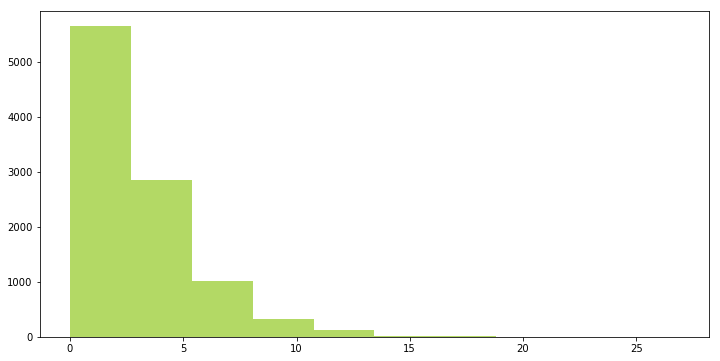

In [10]:
k = 3 
x = chi2.rvs(k, size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
# TODO 
ax.hist(x,facecolor='yellowgreen',alpha=0.75)
plt.show()

**Part B**: Look up the mean and variance of the Chi-squared distribution with parameter $k=3$ and report them here. 

当$k=3$(k表示degree of freedom)时,卡方分布的均值为:
$$Mean(x)=k=3$$
方差为:
$$Var(x)=k*2=3*2=6$$

**Part C**: In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Chi-squared distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Chi-squared distribution with parameter $k=3$.  For each random sample, compute the 95% confidence interval for the mean.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\mu$ where $\mu$ is the true mean of the distribution. Color confidence intervals black if they cover the true mean, and red if they don't.  

Proporation is :  0.948
-------------------------------


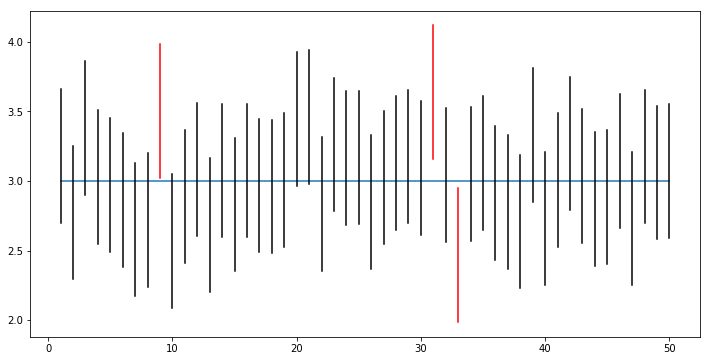

In [11]:
def CIs_(data, alpha=0.05):
    u = data.mean()
    n = len(data)
    z = norm.ppf(1-alpha/2)
    sigma = np.sqrt(6)
    half_width = z * sigma / np.sqrt(n)
    CI = np.array([u-half_width, u+half_width])
    return CI

def confidence_intervals(m=500, n=100):
    # TODO 
    k=3
    CI = [CIs_(chi2.rvs(k, size=n)) for i in range(m)]
    return CI
    
CIs = confidence_intervals()

# Report the proportion of confidence intervals that successfully cover 
# the true mean of the distribution
bool_ = [1 if CIs[i][0] <= 3 <= CIs[i][1] else 0 for i in range(500)]
proporation = np.sum(bool_) / 500
print('Proporation is : ', proporation)
print('-------------------------------')
# 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot([1,50],[3,3])
index = list(range(500))
np.random.shuffle(index)
colors = ['r','k']
for i, idx in enumerate(index[:50]):
    #print(colors[bool_[idx])
    ax.plot([i+1,i+1], [CIs[idx][0], CIs[idx][1]], colors[bool_[idx]])
plt.show()

**Part D**: Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

从上面可知,通过采样得到的置信区间覆盖样本分布真实均值的概率为0.95左右,但是又不是完全等于0.95. 我们这里实验次数为500次,随着实验次数的增加,
得到的覆盖了将会越来越接近0.95.

### [20 points] Problem 5 - Bootstrapped Confidence Intervals 
***

An important feature in online advertising is the so-called _dwell time_, or the amount of time that a user spends viewing a particular piece of content. The data in dwell_times.csv contains the dwell times (in minutes) for 500 randomly selected users viewing an article on a website.  


**Part A**: Read in the data from dwell_times.csv and create a frequency histogram with 20 bins. 

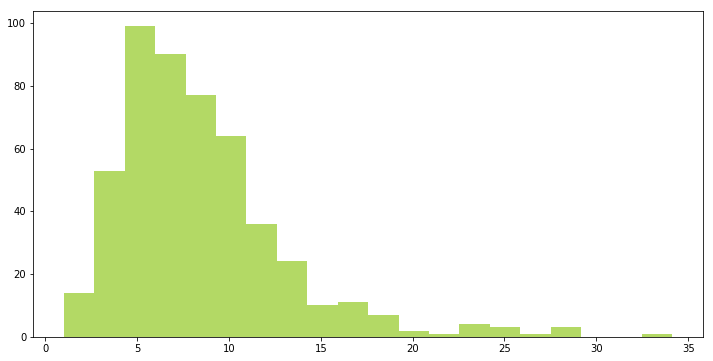

In [12]:
# Load the data
dwell = pd.read_csv('dwell_times.csv')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.hist(dwell['dwell time'], bins=20, facecolor='yellowgreen',alpha=0.75)
plt.show()

**Part B**: Complete the function dwell_mean below to create an empirical bootstrapped confidence interval at the 95% confidence level for the mean dwell time.  Use at least 5000 bootstrap resamples. In addition to returning the confidence interval, your function should also plot a histogram of the bootstrap resample means, along with some graphical representation of the 95% confidence interval. 

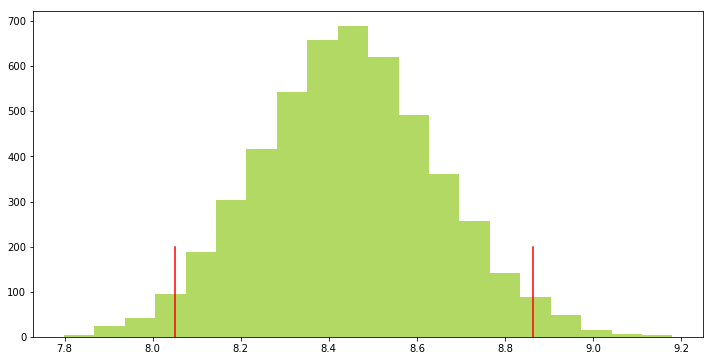

CI:  [ 8.05081796  8.86422327]


In [13]:
def dwell_mean(df, num_boots=5000, isPlot=False):
    n = len(df)
    means = []
    for i in range(num_boots):
        means.append(np.mean(df.sample(n, replace=True)))
    
    CI = np.array([np.percentile(means,2.5),np.percentile(means,97.5)])
    
    if isPlot: 
        # TODO plot histogram 
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
        ax.hist(means, bins=20, facecolor='yellowgreen',alpha=0.75)
        ax.plot([CI[0],CI[0]], [0,200],'r')
        ax.plot([CI[1],CI[1]], [0,200],'r')
        plt.show()
    
    return CI 

CI = dwell_mean(dwell['dwell time'], isPlot=True)

#  plot a histogram of the bootstrap resample means
print('CI: ', CI)

**Part C**: Suppose you are told that the actual dwell times in dwell_times.csv were sampled from a [LogNormal]() distribution with parameters $\mu=2$ and $\sigma^2 = \frac{1}{4}$. Go to the linked Wiki page and read about the LogNormal distribution.  Then compute the exact **mean**, **median**, and **standard deviation** of the distribution for the given parameters and report them here. 

查阅资料可知,LogNorm分布的样本,均值为:
$$Mean(x)=\exp{(\mu+\sigma^2/2)}=8.37$$
中值为:
$$Median(x)=\exp{(x)}=7.39$$
标准差为:
$$SD(x)=\sqrt{(\exp{(\sigma^2)-1)}\exp{(2\mu+\sigma^2}))}=4.46$$

**Part D**: Use the true standard deviation of the distribution to compute a traditional 95% confidence interval for the sample mean of the dwell time data.  Compare the traditional 95% confidence interval to the bootstrapped 95% confidence interval. Do both confidence intervals cover the true mean?  Do both confidence intervals have roughly the same width?   

In [14]:
# 
n = len(dwell)
alpha = 0.05
z_alpha_div_2 = norm.ppf(1 - alpha / 2)
dwell_mean = np.mean(dwell['dwell time'])
std_val = np.sqrt(1/4)
half_width = z_alpha_div_2 * std_val / np.sqrt(n)

CI = np.array([dwell_mean-half_width, dwell_mean+half_width])
print('CI : ', CI)

CI :  [ 8.40131406  8.48896632]


采用bootstrap方法得到的置信度区间为: [8.05, 8.85], 覆盖了样本分布真实的均值8.37; 上面直接计算得到的置信度区间为[8.40,8.49],没有覆盖样本
真实分布均值8.37.

**Part E**: Complete the function dwell_stdev below to create an empirical bootstrapped confidence interval at the 95% confidence level for the standard deviation of dwell time.  Use at least 5000 bootstrapped resamples. In addition to returning the confidence interval, your function should also plot a histogram of the bootstrap resample standard deviations including some graphical indication of the 95% confidence interval.  

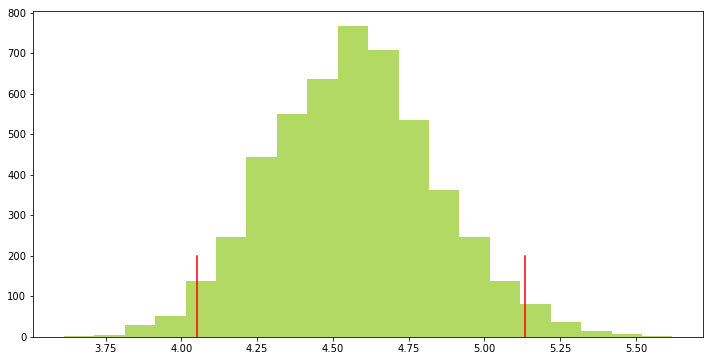

CI:  [ 4.05260683  5.13505934]


In [15]:
def dwell_stdev(df, num_boots=5000, isPlot=False):
    stdevs = []
    for i in range(num_boots):
        stdevs.append(np.std(df.sample(n, replace=True)))
        
    CI = np.array([np.percentile(stdevs,2.5),np.percentile(stdevs,97.5)])
    
    if isPlot: 
        # TODO plot histogram 
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
        ax.hist(stdevs, bins=20, facecolor='yellowgreen',alpha=0.75)
        ax.plot([CI[0],CI[0]], [0,200],'r')
        ax.plot([CI[1],CI[1]], [0,200],'r')
        plt.show()
    
    return CI
        
CI = dwell_stdev(dwell['dwell time'], isPlot=True)
#  plot a histogram of the bootstrap resample means
print('CI: ', CI)

**Part F**: Does the true standard deviation of the distribution fall inside your 95% bootstrapped confidence interval? 

上面得到的置信区间为[4.05,5.11],覆盖了真实的分布标准差4.46.

**Part G**: Complete the function dwell_med below to create an empirical bootstrapped confidence interval at the 95% confidence level for the median dwell time.  Use at least 5000 bootstrap resamples. In addition to returning the confidence interval, your function should also plot a histogram of the bootstrap resample medians including some graphical indication of the 95% confidence interval.  

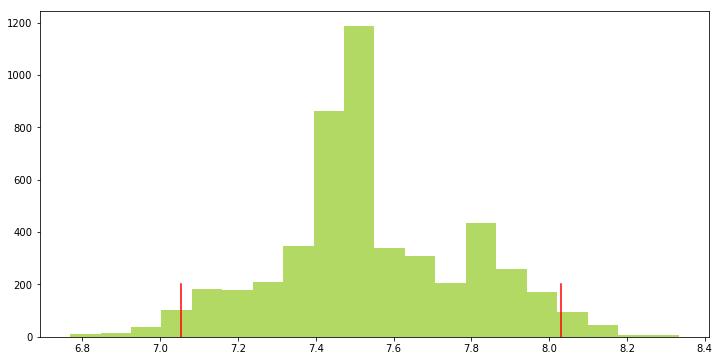

CI:  [ 7.05264048  8.03146165]


In [16]:
def dwell_med(df, num_boots=5000, isPlot=False):
    meds = []
    for i in range(num_boots):
        meds.append(np.median(df.sample(n, replace=True)))
        
    CI = np.array([np.percentile(meds,2.5),np.percentile(meds,97.5)])
    
    if isPlot: 
        # TODO plot histogram 
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
        ax.hist(meds, bins=20, facecolor='yellowgreen',alpha=0.75)
        ax.plot([CI[0],CI[0]], [0,200],'r')
        ax.plot([CI[1],CI[1]], [0,200],'r')
        plt.show()
    
    return CI
        
CI = dwell_med(dwell['dwell time'], isPlot=True)
#  plot a histogram of the bootstrap resample means
print('CI: ', CI)

**Part H**: Does the true median of the distribution fall inside your 95% bootstrapped confidence interval? 

上面得到的置信区间为[7.06,8.03],覆盖了真实样本分布中值7.93.

### [15 points] Problem 6 - Autograding Simulation Homework 
***

Suppose that you are the grader for an Introduction to Data Science course and your boss has asked you to write an autograder for a homework problem on simulation.  Specifically, students have been asked to write a simulation to estimate the expected number of rolls it will take until doubles are rolled with a pair of fair, six-sided dice (i.e. until both dice show the same value).  The students have been asked to structure their code so that it runs many trials of the experiment and returns the sample mean of the trials, as well as an array containing the result of each individual trial. 

The solutions submitted by three students in the course are given below. 

In [17]:
def student1(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 0
        while np.random.choice([1,2,3,4,5,6]) != np.random.choice([1,2,3,4,5,6]):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student2(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 1
        while int(6*np.random.uniform(0,1)+1) != int(6*np.random.uniform(0,1)+1):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student3(num_trials=5000):
    t = np.random.exponential(6, size=num_trials)
    return np.mean(t), t 

Now, you landed this job at the last minute, and your probability theory is a little rusty.  Luckily, your boss has given you her solution to the problem which is shown below: 

In [18]:
def prof(num_trials=5000):
    t = np.random.geometric(1/6, size=num_trials)
    return np.mean(t), t

Knowing that your probability theory is rusty, your boss has suggested that your autograder be constructed solely based on confidence intervals to compare the students' estimates of the expected value of the experiment to her own estimate.  Finally, although there are only examples from three students above, there are actually more than 100 students in the course, so tailoring your tests to features of individual students' code is out of the question. 

**Part A**: Complete the function autograder below, which takes in the realizations of the trials from your professor's code and one of the students' codes, as well as the $\alpha$ for a $100(1-\alpha)\%$ confidence interval and returns a string indicating whether the student passed or failed the test. **Clearly** indicate what statistical test(s) your autograder is using and why this is a good idea.  Then demonstrate the use of your autograder to grade the three student solutions above based on a 95% confidence level. 

In [19]:
def autograder(pf, st, alpha=0.05):
    # TODO 
    pf_mean, pf_t = pf()
    st_mean, st_t = st()
    
    z_alpha_div_2 = norm.ppf(1 - alpha / 2)
    std_val = pf_t.std()
    
    half_width = z_alpha_div_2 * std_val / np.sqrt(len(pf_t))
    CI = np.array([pf_mean-half_width, pf_mean+half_width])
    
    if CI[0] <= st_mean <= CI[1]:
        return "Passed"
    else:
        return "Failed"
    
# Test student 1
print('Test student 1 ... ')
print(autograder(prof, student1))

# Test student 2
print('Test student 2 ... ')
print(autograder(prof, student2))

# Test student 3
print('Test student 3 ... ')
print(autograder(prof, student3))

Test student 1 ... 
Failed
Test student 2 ... 
Passed
Test student 3 ... 
Passed


**[Extra Credit] Part B**: You realize that tests based solely on the estimate of the mean are not robust.  Come up with a better autograder that, again using tests based on confidence intervals, compares the students' solutions to the professor's solutions on statistical properties beyond just the mean. Again, **clearly** motivate the features of your autograder based on theory developed in class.    